In [2]:
import torch
from torch import Tensor
from tqdm import tqdm
from typing import Union, Tuple, Optional
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray

print(plt.style.available)
plt.rcParams['text.usetex'] = True
plt.style.use("seaborn-white")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Serret-Frenet Frame

Below we describe the dynamics of the Serret-Frenet Frame:

$$
\frac{d\textbf{T}}{ds} = \kappa \textbf{N}
$$
$$
\frac{d\textbf{N}}{ds} = -\kappa \textbf{T} + \tau \textbf{B}
$$
$$
\frac{d\textbf{B}}{ds} = -\tau \textbf{N}
$$
where $d/ds$ is the derivative w.r.t. the arclength, $\kappa$ is the curvature, and $\tau$ is the torsion of the space curve. (Intuitively, curvature measures the failure of a curve to be a straight line, while torsion measures the failure of a curve to be planar.)

In concise matrix form, this is equivalently represented as 

$$
\frac{d}{ds}\begin{bmatrix} \textbf{T} \\ \textbf{N} \\ \textbf{B}\end{bmatrix} = \begin{bmatrix} 0 & \kappa & 0 \\ -\kappa & 0 & \tau \\ 0 & -\tau &  0\end{bmatrix} \begin{bmatrix} \textbf{T} \\ \textbf{N} \\ \textbf{B}\end{bmatrix}
$$

The above expressions for $\textbf{T}, \textbf{N},$ and $\textbf{B}$ depend on the curve being given in terms of the arclength parameter. This is a natural assumption, but may be awkward to work with in practice. Therefore, another equivalent expression is given. Suppose that the curve is given by $r(t)$ where parameter $t$ is now time instead of the arclength. Now the tangent, normal, and binormal vectors may respectively be rewritten as:
$$
\textbf{T}(t) = \frac{r'(t)}{||r'(t)||}
$$
$$
\textbf{N}(t) = \frac{\textbf{T}'(t)}{||\textbf{T}'(t)||} = \frac{r'(t) \times (r''(t) \times r'(t))}{||r'(t)|| \; ||r'(t) \times r'(t)||}
$$
$$
\textbf{B}(t) = \textbf{T}(t) \times\textbf{N}(t) = \frac{r'(t) \times r''(t)}{||r'(t) \times r'(t)||}
$$

(In this paragraph, I use perpendicular and normal interchangeably as they mean the same thing. Normal can be used to describe the fact that two vectors are perpendicular to each other, but this is not to be confused with the normal vector itself. Sorry if this terminology is confusing). Geometrically speaking, the derivative of a vector is a perpendicular vector. Therefore, the normal vector is in fact normal to the tangent vector. Because the tangent and normal vector are perpendicular to each other, they can be viewed as forming a plane. Therefore, the cross product of these vectors forms the final binormal vector which is perpendicular to this plane. When the normal vector is to the "right" of the tangent vector, the binormal vector will be pointing upwards. When it is to the "left" the binormal vector will be pointing downwards. 

By applying the chain rule, the matrix form for this expression picks up an additional factor of $||r'(t)||$:
$$
\frac{d}{dt}\begin{bmatrix}\textbf{T} \\ \textbf{N} \\ \textbf{B}\end{bmatrix} = ||r'(t)||\begin{bmatrix} 0 & \kappa & 0 \\ -\kappa & 0 & \tau \\ 0 & -\tau &  0\end{bmatrix} \begin{bmatrix} \textbf{T} \\ \textbf{N} \\ \textbf{B}\end{bmatrix}
$$
Explicit expressions for the curvature and torsion are computed as:
$$
\kappa = \frac{||r'(t) \times r''(t)||}{||r'(t)||^3}
$$
$$
\tau = \frac{[r'(t), r''(t), r'''(t)]}{||r'(t) \times r''(t)||^2}
$$

One thing to keep in mind is that when the curvature is always zero, then the curve will be a straight line, and the vectors $\textbf{N}, \textbf{B}$, and the torsion are no longer well-defined. When the torsion is always zero, then the curve will always lie in a plane. 


# Helix Example
Suppose we have the parametric equation of a Helix. The curve may then be defined w.r.t. time $t$ as:
$$
r(t) = \begin{pmatrix} Rcos(t) \\ Rsin(t) \\ \frac{p}{2\pi}t \end{pmatrix}
$$

where $R$ is a constant radius from the vertical axis that lies in the middle of the helix, and $p$ is the constant pitch or vertical distance between turns. 

### Tangent Vector $\textbf{T}(t)$
Recall that the equation of the tangent vector is given as:
$$
\textbf{T}(t) = \frac{r'(t)}{||r'(t)||}
$$
We first compute the derivative of the curve.
$$
r'(t) = \begin{pmatrix} -Rsin(t) \\ Rcos(t) \\ \frac{p}{2\pi} \end{pmatrix}
$$

The magnitude is simply given as:
$$
||r'(t)|| = \sqrt{R^2 + \left( \frac{p}{2\pi} \right)^2}
$$
Plugging this into the equation that we have for the tangent vector:
$$
\textbf{T}(t)  = \frac{1}{\sqrt{R^2 + \left( \frac{p}{2\pi} \right)^2}}\begin{pmatrix} -Rsin(t) \\ Rcos(t) \\ \frac{p}{2\pi} \end{pmatrix}
$$
### Normal Vector $\textbf{N}(t)$
The formula for the unit normal vector is given as:
$$
\textbf{N}(t) = \frac{\textbf{T}'(t)}{||\textbf{T}'(t)||}
$$

Differentiating $\textbf{T}$ gives:
$$
\textbf{T}'(t)  = \frac{1}{\sqrt{R^2 + \left( \frac{p}{2\pi} \right)^2}}\begin{pmatrix} -Rcos(t) \\ -Rsin(t) \\ 0 \end{pmatrix}
$$
The magnitude can be computed as
$$
|\textbf{T}'(t)| = \frac{R}{R^2 + \left(\frac{p}{2\pi} \right)^2}
$$

Thus our unit normal vector is:
$$
\textbf{N}(t) = \frac{1}{R}\begin{pmatrix}-cos(t) \\ -sin(t) \\ 0\end{pmatrix}
$$

### Binomial Vector $\textbf{B}(t)$

The binomial vector is given simply as 
$$
\textbf{B}(t) = \textbf{T}(t) \times \textbf{N}(t)
$$
Computing the cross product, we get that the vector is
$$
\textbf{B}(t) = \frac{1}{R^2 + \left(\frac{p}{2\pi} \right)^2} \begin{pmatrix} \frac{p}{2\pi}sin(t) \\ -\frac{p}{2\pi}cos(t) \\ R \end{pmatrix}
$$

### Summary of Equations:

* $\textbf{T}(t)  = \frac{1}{\sqrt{R^2 + \left( \frac{p}{2\pi} \right)^2}}\begin{pmatrix} -Rsin(t) \\ Rcos(t) \\ \frac{p}{2\pi} \end{pmatrix}$
* $\textbf{N}(t) = \frac{1}{R}\begin{pmatrix}-cos(t) \\ -sin(t) \\ 0\end{pmatrix}$
* $\textbf{B}(t) = \frac{1}{R^2 + \left(\frac{p}{2\pi} \right)^2} \begin{pmatrix} \frac{p}{2\pi}sin(t) \\ -\frac{p}{2\pi}cos(t) \\ R \end{pmatrix}$

shape tangent_vect: (1000, 3)
shape normal_vect: (1000, 3)
shape binormal_vect: (1000, 3)


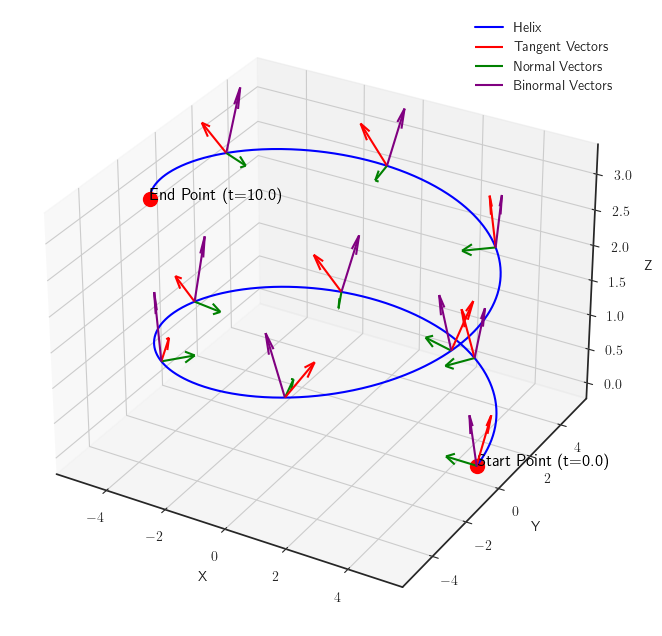

In [15]:
t = np.linspace(0, 10, 1000)  # Time samples
t = t.reshape(-1, 1)

def helix(t: ndarray[float], R: float, p: float) -> ndarray[float]:
    """
    Gives the 3D posiition of the helix w.r.t. time
    :param t: Time samples
    :param R: Radius R
    :param p: Pitch 
    :return: 3D position (x, y, z)
    """
    x = R * np.cos(t)
    y = R * np.sin(t)
    z = p / (2 * np.pi) * t
    return np.concatenate((x, y, z), axis=1)
def tangent_vector(t: ndarray[float], R: float, p: float) -> ndarray[float]:
    """
    Gives the tangent vector of the helix at time t
    :param t: Time samples
    :param R: Radius R
    :param p: Pitch
    :return: Tangent vector
    """
    coeff = 1 / np.sqrt(R**2 + (p / 2*np.pi)**2)
    vector = np.concatenate((-R*np.sin(t), R*np.cos(t), np.ones_like(t) * p/2*np.pi), axis=1)
    return coeff * vector
def normal_vector(t: ndarray[float], R: float, p: float) -> ndarray[float]:
    """
    Gives the normal vector of the helix at time t
    :param t: Time samples
    :param R: Radius R
    :param p: Pitch. Not used in this calculation but left in header for consistency.
    :return: Normal vector
    """
    coeff = 1/R
    vector = np.concatenate((-R*np.cos(t), -R*np.sin(t), np.zeros_like(t)), axis=1)
    return coeff * vector
def binormal_vector(t: ndarray[float], R: float, p: float) -> ndarray[float]:
    """
    Gives the binormal vector of the helix at time t
    :param t: Time samples
    :param R: Radius R
    :param p: Pitch
    :return: Binormal vector
    """
    coeff = 1/(R**2 + (p / 2*np.pi)**2)
    vector = np.concatenate(((p/2*np.pi)*np.sin(t), -(p/2*np.pi)*np.cos(t), np.ones_like(t)*R), axis=1)
    return coeff * vector

R = 5  # helix radius
p = 2  # constant pitch (distance between turns)

helix_points = helix(t, R, p)
tangent_vect = tangent_vector(t, R, p)
normal_vect = normal_vector(t, R, p)
binormal_vect = binormal_vector(t, R, p)

print(f"shape tangent_vect: {tangent_vect.shape}")
print(f"shape normal_vect: {normal_vect.shape}")
print(f"shape binormal_vect: {binormal_vect.shape}")

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the helix
ax.plot(helix_points[:, 0], helix_points[:, 1], helix_points[:, 2], label='Helix', color='blue')

# Plot the point
start_point = tuple(helix_points[0])
size_s = 100
ax.scatter(*start_point, color='red', s=size_s)  # `s` is the size of the point
ax.text(*start_point, color='black', fontsize=12, s=f"Start Point (t={t[0,0]:.1f})")
end_point = tuple(helix_points[-1])
ax.scatter(*end_point, color='red', s=size_s)  # `s` is the size of the point
ax.text(*end_point, color='black', fontsize=12, s=f"End Point (t={t[-1,0]:.1f})")

# Select a subset of points for quiver plots (for visual clarity)
step = 100
ax.quiver(helix_points[::step, 0], helix_points[::step, 1], helix_points[::step, 2],
          tangent_vect[::step, 0], tangent_vect[::step, 1], tangent_vect[::step, 2],
          color='red', length=1, normalize=True, label='Tangent Vectors')

ax.quiver(helix_points[::step, 0], helix_points[::step, 1], helix_points[::step, 2],
          normal_vect[::step, 0], normal_vect[::step, 1], normal_vect[::step, 2],
          color='green', length=1, normalize=True, label='Normal Vectors')

ax.quiver(helix_points[::step, 0], helix_points[::step, 1], helix_points[::step, 2],
          binormal_vect[::step, 0], binormal_vect[::step, 1], binormal_vect[::step, 2],
          color='purple', length=1, normalize=True, label='Binormal Vectors')

# Labels and plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# Projectile Trajectory Example
Now we cover the parametric curve which defines the trajectory of a projectile. The curve may then be defined w.r.t. time $t$ as:
$$
r(t) = \begin{pmatrix} x(t) \\ y(t) \\ z(t) \end{pmatrix} = \begin{pmatrix} v_0cos(\theta)t \\ v_0sin(\theta)t - \frac{1}{2}gt^2 \\ 0 \end{pmatrix}
$$

Where:
* $v_0$ is the initial velocity
* $\theta$ is the launch angle
* $g$ is a gravitational constant
* $t$ is time
* $x(t)$ represents horizontal motion
* $y(t)$ represents vertical motion
* $z(t)$ remains 0 since the motion is restricted to the $xy$-plane

### Tangent Vector $\textbf{T}(t)$
Recall that the equation of the tangent vector is given as:
$$
\textbf{T}(t) = \frac{r'(t)}{||r'(t)||}
$$
We first compute the derivative of the curve.
$$
r'(t) = \begin{pmatrix} v_0cos(\theta) \\ v_0sin(\theta) - gt \\ 0 \end{pmatrix}
$$

The magnitude is simply given as:
$$
||r'(t)|| = \sqrt{(v_0cos(\theta))^2 + (v_0sin(\theta)-gt)^2}
$$
Plugging this into the equation that we have for the tangent vector:
$$
\textbf{T}(t) = \frac{1}{\sqrt{(v_0cos(\theta))^2 + (v_0sin(\theta)-gt)^2}}\begin{pmatrix} v_0cos(\theta) \\ v_0sin(\theta) - gt \\ 0 \end{pmatrix}
$$
### Normal Vector $\textbf{N}(t)$
The formula for the unit normal vector is given as:
$$
\textbf{N}(t) = \frac{\textbf{T}'(t)}{||\textbf{T}'(t)||}
$$

We first differentiate $\textbf{T}(t)$ w.r.t. $t$, but for simplicity, let's first denote the magnitude of the velocity as $v(t) = |r'(t)|$ so that we may express $\textbf{T}(t)$ as:
$$
\textbf{T}(t) = \frac{1}{v(t)}r'(t)
$$

Now differentiating $\textbf{T}$ gives:
$$
\textbf{T}'(t) = \frac{1}{v(t)}\frac{d}{dt}r'(t) - \frac{1}{v(t)^2}r'(t)\frac{d}{dt}v(t)
$$

The second derivative of the position, $r''(t)$, is simply the acceleration:
$$
r''(t) = \begin{pmatrix} 0 \\ -g \\ 0 \end{pmatrix}
$$
Thus our unit normal vector is:
$$
\textbf{N}(t) = \frac{1}{v(t)}\begin{pmatrix}0 \\ -g \\ 0\end{pmatrix}
$$

### Binomial Vector $\textbf{B}(t)$

The binomial vector is given simply as 
$$
\textbf{B}(t) = \textbf{T}(t) \times \textbf{N}(t)
$$
Since the motion is restricted to the $xy$-plane, the binormal vector will simply point along the $z$-axis. Therefore, we obtain through the cross-product:
$$
\textbf{B}(t) = \textbf{T}(t) \times \textbf{N}(t) = \begin{pmatrix}\textbf{T}_x(t) \\ \textbf{T}(t)_y(t) \\ 0\end{pmatrix} \times \begin{pmatrix} 0 \\ -1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
$$

This illustrates that our binormal vector is always in the positive $z$-direction, perpendicular to the plane of motion. 

### Summary of Equations:

* $\textbf{T}(t) = \frac{1}{\sqrt{(v_0cos(\theta))^2 + (v_0sin(\theta)-gt)^2}}\begin{pmatrix} v_0cos(\theta) \\ v_0sin(\theta) - gt \\ 0 \end{pmatrix}$
* $\textbf{N}(t) = \frac{1}{v(t)}\begin{pmatrix}0 \\ -g \\ 0\end{pmatrix}$
* $\textbf{B}(t) = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$



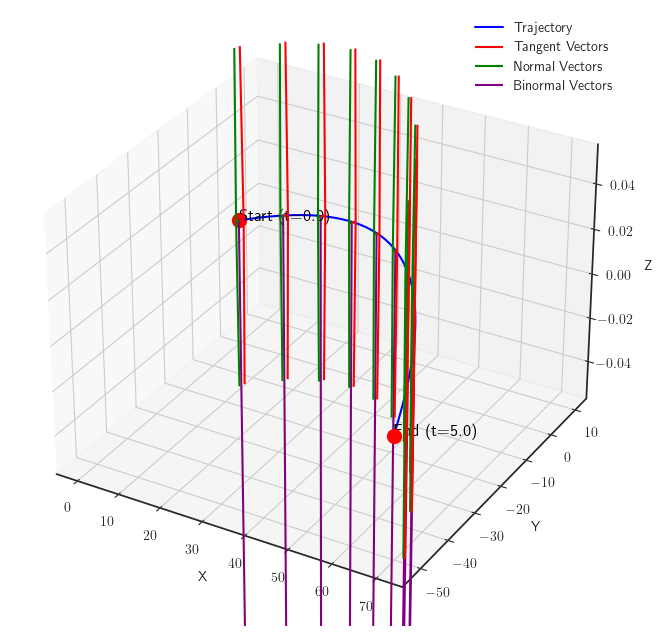

In [18]:
t = np.linspace(0, 5, 1000)  # Time samples
t = t.reshape(-1, 1)

def projectile_trajectory(t: np.ndarray, v0: float, theta: float, g: float) -> np.ndarray:
    """
    Gives the 3D position of the projectile w.r.t. time
    :param t: Time samples
    :param v0: Initial velocity
    :param theta: Launch angle in radians
    :param g: Gravitational acceleration
    :return: 3D position (x, y, z)
    """
    x = v0 * np.cos(theta) * t
    y = v0 * np.sin(theta) * t - 0.5 * g * t**2
    z = np.zeros_like(t)  # Motion in xy-plane, so z = 0
    return np.concatenate((x, y, z), axis=1)

def tangent_vector(t: np.ndarray, v0: float, theta: float, g: float) -> np.ndarray:
    """
    Gives the tangent vector of the projectile at time t
    :param t: Time samples
    :param v0: Initial velocity
    :param theta: Launch angle in radians
    :param g: Gravitational acceleration
    :return: Tangent vector
    """
    vx = np.ones_like(t) * (v0 * np.cos(theta))
    vy = v0 * np.sin(theta) - g * t
    vz = np.zeros_like(t)
    velocity = np.concatenate((vx, vy, vz), axis=1)
    norm_velocity = np.linalg.norm(velocity, axis=1, keepdims=True)
    return velocity / norm_velocity

def normal_vector(t: np.ndarray, v0: float, theta: float, g: float) -> np.ndarray:
    """
    Gives the normal vector of the projectile at time t
    :param t: Time samples
    :param v0: Initial velocity
    :param theta: Launch angle in radians
    :param g: Gravitational acceleration
    :return: Normal vector
    """
    ax = np.zeros_like(t)
    ay = -g * np.ones_like(t)
    az = np.zeros_like(t)
    acceleration = np.concatenate((ax, ay, az), axis=1)
    norm_acceleration = np.linalg.norm(acceleration, axis=1, keepdims=True)
    return acceleration / norm_acceleration

def binormal_vector(tangent_vect: np.ndarray, normal_vect: np.ndarray) -> np.ndarray:
    """
    Gives the binormal vector of the projectile at time t
    :param tangent_vect: Tangent vector
    :param normal_vect: Normal vector
    :return: Binormal vector
    """
    binormal = np.cross(tangent_vect, normal_vect)
    norm_binormal = np.linalg.norm(binormal, axis=1, keepdims=True)
    return binormal / norm_binormal

v0 = 20  # Initial velocity (m/s)
theta = np.pi / 4  # Launch angle (45 degrees in radians)
g = 9.81  # Gravitational acceleration (m/s^2)

# Calculate trajectory and vectors
trajectory_points = projectile_trajectory(t, v0, theta, g)
tangent_vect = tangent_vector(t, v0, theta, g)
normal_vect = normal_vector(t, v0, theta, g)
binormal_vect = binormal_vector(tangent_vect, normal_vect)

# Plotting the trajectory and vectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the parabolic trajectory
ax.plot(trajectory_points[:, 0], trajectory_points[:, 1], trajectory_points[:, 2], label='Trajectory', color='blue')

# Plot the point
start_point = tuple(trajectory_points[0])
end_point = tuple(trajectory_points[-1])
size_s = 100
ax.scatter(*start_point, color='red', s=size_s)  # Start point
ax.text(*start_point, f"Start (t={t[0,0]:.1f})", color='black', fontsize=12)
ax.scatter(*end_point, color='red', s=size_s)  # End point
ax.text(*end_point, f"End (t={t[-1,0]:.1f})", color='black', fontsize=12)

# Select a subset of points for quiver plots (for visual clarity)
step = 100
ax.quiver(trajectory_points[::step, 0], trajectory_points[::step, 1], trajectory_points[::step, 2],
          tangent_vect[::step, 0], tangent_vect[::step, 1], tangent_vect[::step, 2],
          color='red', length=1, normalize=True, label='Tangent Vectors')

ax.quiver(trajectory_points[::step, 0], trajectory_points[::step, 1], trajectory_points[::step, 2],
          normal_vect[::step, 0], normal_vect[::step, 1], normal_vect[::step, 2],
          color='green', length=1, normalize=True, label='Normal Vectors')

ax.quiver(trajectory_points[::step, 0], trajectory_points[::step, 1], trajectory_points[::step, 2],
          binormal_vect[::step, 0], binormal_vect[::step, 1], binormal_vect[::step, 2],
          color='purple', length=1, normalize=True, label='Binormal Vectors')

# Labels and plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()